In [72]:
library(d3Network)

Warning message:
"package 'd3Network' was built under R version 4.0.5"


In [1]:
library(arules)  
library(arulesViz)
library(wordcloud)
library(tidyverse)

Warning message:
"package 'arules' was built under R version 4.0.5"
Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Warning message:
"package 'arulesViz' was built under R version 4.0.5"
Warning message:
"package 'wordcloud' was built under R version 4.0.5"
Loading required package: RColorBrewer

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matri

# A1

In [2]:
data<-read.csv("big_student_clear_third_version.csv")
memory.limit()

[1] 7865

In [3]:
head(data)

,X,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,...,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
2,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
3,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
4,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
5,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32
6,23,HarvardX,CS50x,2012,Summer,MHxPC130191782,1,0,0,Pakistan,...,0,2012-07-24,2013-05-05,2,2,197757,1,0,0,22


## 1단계

In [4]:
data <- data %>% rename(
Institute = institute,
Course = course_id ,
Region = final_cc_cname_DI,
Degree =LoE_DI
)
head(data)

,X,Institute,Course,year,semester,userid_DI,viewed,explored,certified,Region,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,...,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
2,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
3,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
4,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
5,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32
6,23,HarvardX,CS50x,2012,Summer,MHxPC130191782,1,0,0,Pakistan,...,0,2012-07-24,2013-05-05,2,2,197757,1,0,0,22


## 2단계

In [5]:
data<- data %>%
  mutate(Region = gsub(" ", "", Region) ) # a with acute
data$Region[6]

[1] "Pakistan"

## 3단계

In [6]:
data<- data %>%
  mutate(RawTransactions = paste(Institute,Course, Region,Degree,sep="_") ) 
data$RawTransactions[2]
# a with acute

[1] "HarvardX_PH207x_UnitedStates_Secondary"

## 4단계

In [7]:
data<- data %>%
  mutate(MOOC_transactions = paste(RawTransactions, userid_DI ,sep=" ") ) # a with acute
data$MOOC_transactions[2]

[1] "HarvardX_PH207x_UnitedStates_Secondary MHxPC130237753"

In [15]:
MOOC_transactions = paste(data$userid_DI ,data$RawTransactions,sep=" ")  # a with acute


## 5단계

In [16]:
write(MOOC_transactions, file = "MOOC_User_Course.csv")

In [17]:
unlink("data.csv")

# A2-1

`summary` 함수를 보면, 총 335650 row중 1405개의 column이 생긴 것을 보면 생각보다 데이터가 sparce하지 않은 것을 알 수 있습니다.

가장 많이 나온 아이템은 MITx_6.00x_UnitedStates_Bachelor's 이고 MITx_6.00x_UnitedStates_Secondary,  MITx_6.00x_India_Bachelor's, MITx_6.002x_India_Bachelor's 가 2,3,4 위를 한 것을 보면 MIT가 많은 부분을 차지하고 있다고 해석할 수 있습니다.

size는 1부터 13까지 다양하고 대부분 1과 2가 총 321501개 임으로 전체 데이터의 0.95787 정도가 1,2개의 element로 이루어 진 것을 알 수 있습니다.

In [2]:
single = read.transactions('MOOC_User_Course.csv',
                                format = "single", cols = c(1,2), rm.duplicates=TRUE)


In [3]:
summary(single)

transactions as itemMatrix in sparse format with
 335650 rows (elements/itemsets/transactions) and
 1405 columns (items) and a density of 0.000877119 

most frequent items:
    MITx_6.00x_UnitedStates_Bachelor's      MITx_6.00x_UnitedStates_Secondary 
                                 14192                                   8841 
           MITx_6.00x_India_Bachelor's           MITx_6.002x_India_Bachelor's 
                                  7813                                   7633 
HarvardX_CS50x_UnitedStates_Bachelor's                                (Other) 
                                  7410                                 367750 

element (itemset/transaction) length distribution:
sizes
     1      2      3      4      5      6      7      8      9     10     11 
278440  43061   9997   2812    799    293    109     44     37     22     21 
    12     13 
     9      6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.232   1.000  13.000 

includes 

# A2-2

wordcloud를 생성할때, max.word를 안하면 한 화면에 전체 다 출력할 수 없어서 `max.word = 40` 를 해줬습니다

In [4]:
itemName <- itemLabels(single)
itemCount <- itemFrequency(single)*nrow(single)

Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"HarvardX_CS50x_UnitedStates_Bachelor's could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"MITx_6.00x_UnitedStates_Bachelor's could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"HarvardX_ER22x_UnitedStates_Bachelor's could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"MITx_6.002x_India_Bachelor's could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"HarvardX_PH207x_UnitedStates_Bachelor's could not be fit on page. It will not be plotted."
Warning message in wordcloud(words = itemName, freq = itemCount, max.words = 40, :
"MITx_6.00x_India_Bachelor's could not be fit on page. It wi

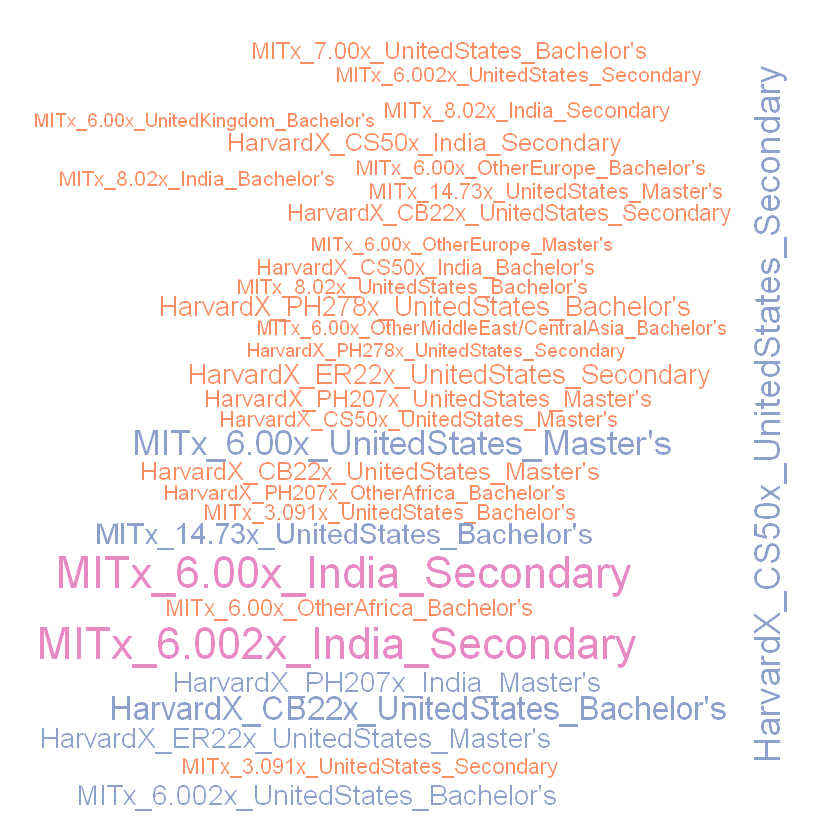

In [5]:
col <- brewer.pal(8, "Set2")
wordcloud(words = itemName, freq = itemCount, max.words =40, min.freq = 100, scale=c(4,0.5),col = col)

# A2-3

top 5는 1,2,5위가 USA입니다. 그리고 3,4위는 india 입니다.

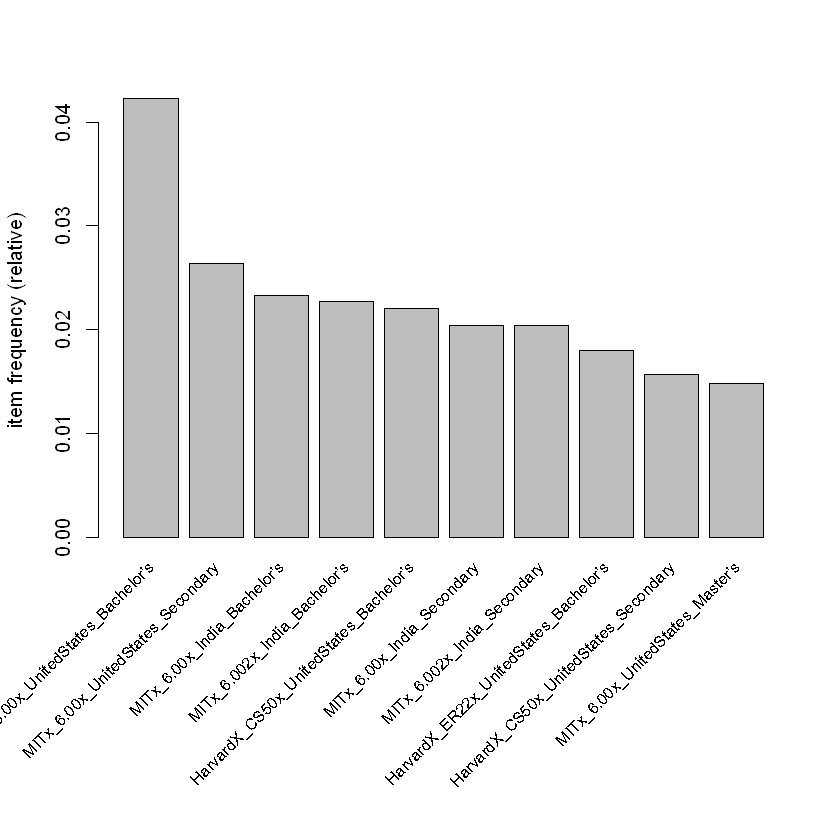

In [46]:
itemFrequencyPlot(single,  topN = 10,support = 0.01,cex.names=0.8)

# A3-1

아래 A3-2를 참조하여 

support = {0.001,0.002,0.003,0.004, ... , 0.001 }
confidence= {0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4} 로 grid search를 실행해보았습니다.

그렇게 했더니 confidence = 0.05 / support= 0.001 일떄 rule수가 51로 가장 규칙이 많이 생성됬습니다.

In [25]:
confi <- seq(from = 0.05, to = 0.4 , by = 0.05)
sup <- seq(from = 0.001, to = 0.005 , by = 0.001)
n_rules <- matrix(0,nrow=length(confi)*length(sup),3)
t<-1
for(i in confi){
    for(j in sup){
    rules <- apriori(single, parameter=list(support=j, confidence=i))
    inspect(rules) 
    n_rules[t,]<-c(i,j,length(rules))
    t<-t+1       
    }
}


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 335 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1405 item(s), 335650 transaction(s)] done [0.11s].
sorting and recoding items ... [251 item(s)] done [0.00s].
creating transaction tree ... done [0.11s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [51 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].
     lhs                                          rhs                                           support confidence    coverage      lift count
[1]  {HarvardX_CS50x_UnitedStates_Master's}    => {MITx_6.00x_UnitedStates_Master's}        0.001218531 0.16985050 0.007174140 11.429495   40

In [26]:
head(n_rules,20)

0.05,0.001,51
0.05,0.002,20
0.05,0.003,6
0.05,0.004,0
0.05,0.005,0
0.10,0.001,34
0.10,0.002,16
0.10,0.003,5
0.10,0.004,0
0.10,0.005,0
0.15,0.001,20


In [27]:
order_rules<-n_rules[c(order(-n_rules[,3])),]

In [28]:
head(order_rules)

0.05,0.001,51
0.10,0.001,34
0.05,0.002,20
0.15,0.001,20
0.10,0.002,16
0.20,0.001,10


# A3-2

### 1&2&3
|question| rule | support | confidence | lift |
| --- | --- | --- | --- | --- |
|max support| {HarvardX_CS50x_UnitedStates_Bachelor's} => {MITx_6.00x_UnitedStates_Bachelor's} | 0.003643676| 0.16504723|3.903474|
|max confidence|{MITx_8.02x_India_Secondary}=> {MITx_6.002x_India_Secondary} |  0.002800536 | 0.3881090 | 19.011790 |
|max lift|{MITx_8.02x_UnitedStates_Bachelor's} => {MITx_6.002x_UnitedStates_Bachelor's}| 0.001391330 | 0.2162037 |19.54978 |


In [48]:
rules <- apriori(single, parameter=list(support=0.001, confidence=0.05))
inspect(rules) 
mat <- as(rules, 'data.frame')

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 335 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1405 item(s), 335650 transaction(s)] done [0.11s].
sorting and recoding items ... [251 item(s)] done [0.00s].
creating transaction tree ... done [0.11s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [51 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].
     lhs                                          rhs                                           support confidence    coverage      lift count
[1]  {HarvardX_CS50x_UnitedStates_Master's}    => {MITx_6.00x_UnitedStates_Master's}        0.001218531 0.16985050 0.007174140 11.429495   40

In [30]:
inspect(sort(rules, by = "support")[1:3])

    lhs                                         rhs                                          support confidence   coverage     lift count
[1] {HarvardX_CS50x_UnitedStates_Bachelor's} => {MITx_6.00x_UnitedStates_Bachelor's}     0.003643676 0.16504723 0.02207657 3.903474  1223
[2] {MITx_6.00x_UnitedStates_Bachelor's}     => {HarvardX_CS50x_UnitedStates_Bachelor's} 0.003643676 0.08617531 0.04228214 3.903474  1223
[3] {MITx_6.00x_India_Secondary}             => {MITx_6.002x_India_Secondary}            0.003625801 0.17745698 0.02043200 8.692854  1217


In [31]:
inspect(sort(rules, by = "confidence")[1:3])

    lhs                                 rhs                                support confidence    coverage     lift count
[1] {MITx_8.02x_India_Secondary}     => {MITx_6.002x_India_Secondary}  0.002800536  0.3881090 0.007215850 19.01179   940
[2] {MITx_8.02x_India_Bachelor's}    => {MITx_6.002x_India_Bachelor's} 0.002496648  0.3856420 0.006474006 16.95804   838
[3] {HarvardX_CS50x_India_Secondary} => {MITx_6.00x_India_Secondary}   0.002681365  0.2939255 0.009122598 14.38555   900


In [32]:
inspect(sort(rules, by = "lift")[1:3])

    lhs                                        rhs                                         support confidence    coverage     lift count
[1] {MITx_8.02x_UnitedStates_Bachelor's}    => {MITx_6.002x_UnitedStates_Bachelor's}   0.001391330  0.2162037 0.006435275 19.54978   467
[2] {MITx_6.002x_UnitedStates_Bachelor's}   => {MITx_8.02x_UnitedStates_Bachelor's}    0.001391330  0.1258082 0.011059139 19.54978   467
[3] {HarvardX_ER22x_UnitedStates_Secondary} => {HarvardX_CB22x_UnitedStates_Secondary} 0.001540295  0.1529586 0.010070013 19.10701   517


In [49]:
head(mat)

,rules,support,confidence,coverage,lift,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,{HarvardX_CS50x_UnitedStates_Master's} => {MITx_6.00x_UnitedStates_Master's},0.001218531,0.16985050,0.007174140,11.42949,409
2,{MITx_6.00x_UnitedStates_Master's} => {HarvardX_CS50x_UnitedStates_Master's},0.001218531,0.08199679,0.014860718,11.42949,409
3,{HarvardX_CS50x_India_Bachelor's} => {MITx_6.00x_India_Bachelor's},0.002016982,0.26918489,0.007492924,11.56430,677
4,{MITx_6.00x_India_Bachelor's} => {HarvardX_CS50x_India_Bachelor's},0.002016982,0.08665045,0.023277223,11.56430,677
5,{MITx_8.02x_India_Bachelor's} => {MITx_6.002x_India_Bachelor's},0.002496648,0.38564197,0.006474006,16.95804,838
6,{MITx_6.002x_India_Bachelor's} => {MITx_8.02x_India_Bachelor's},0.002496648,0.10978645,0.022740950,16.95804,838


### 4:
위에서 구한 rule 값을 데이터프레임으로 저장하고 dyplr 패키지를 사용하여 supportXconfidenceXlift를 해서 새로운 변수 new를 만들었습니다. 그리고 new를 기준으로 내림차순했을 때 상위 6개를 보면 아래와 같습니다. 

new의 실제 식은 P(A,B)^3 / ( P(A)^2 * P(B) ) 입니다.

아래 해를 바탕으로 상위 3개에 대한 값들을 아래에 정리해봤습니다.

|순위| 규칙 | support | confidence | lift | new |
|-|-------------------------------------------------------------|--------|--------|---------|------------|
|1|{MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary}| 0.002800536|0.3881090	|19.01179	|0.020664168|
|2|	{MITx_8.02x_India_Bachelor's} => {MITx_6.002x_India_Bachelor's}| 0.002496648|0.3856420	|16.95804|	0.016327412|
|3|	{HarvardX_CS50x_India_Secondary} => {MITx_6.00x_India_Secondary}| 0.002681365|0.2939255	|14.38555|	0.011337562|

위 식을 가지고 보면, 효용성이 가장 높은 규칙은 {MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary}이고, 아마 학교, 지역, institution이 모두 같고, course만 다름으로, 두 course간 연관관계가 있지 않을까 싶습니다.
두번재 규칙은 첫번째와 동일하게 course만 다름으로 위 course간 연관관계가 있다는 사실을 더 확실하게 알려줍니다.

In [50]:
mat %>% mutate(new = support*confidence*lift ) %>% arrange(desc(new))%>% head()

,rules,support,confidence,coverage,lift,count,new
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,{MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary},0.002800536,0.3881090,0.007215850,19.01179,940,0.020664168
2,{MITx_8.02x_India_Bachelor's} => {MITx_6.002x_India_Bachelor's},0.002496648,0.3856420,0.006474006,16.95804,838,0.016327412
3,{HarvardX_CS50x_India_Secondary} => {MITx_6.00x_India_Secondary},0.002681365,0.2939255,0.009122598,14.38555,900,0.011337562
4,{MITx_6.002x_India_Secondary} => {MITx_8.02x_India_Secondary},0.002800536,0.1371862,0.020414122,19.01179,940,0.007304235
5,{HarvardX_CS50x_India_Bachelor's} => {MITx_6.00x_India_Bachelor's},0.002016982,0.2691849,0.007492924,11.56430,677,0.006278736
6,{MITx_8.02x_UnitedStates_Bachelor's} => {MITx_6.002x_UnitedStates_Bachelor's},0.001391330,0.2162037,0.006435275,19.54978,467,0.005880783


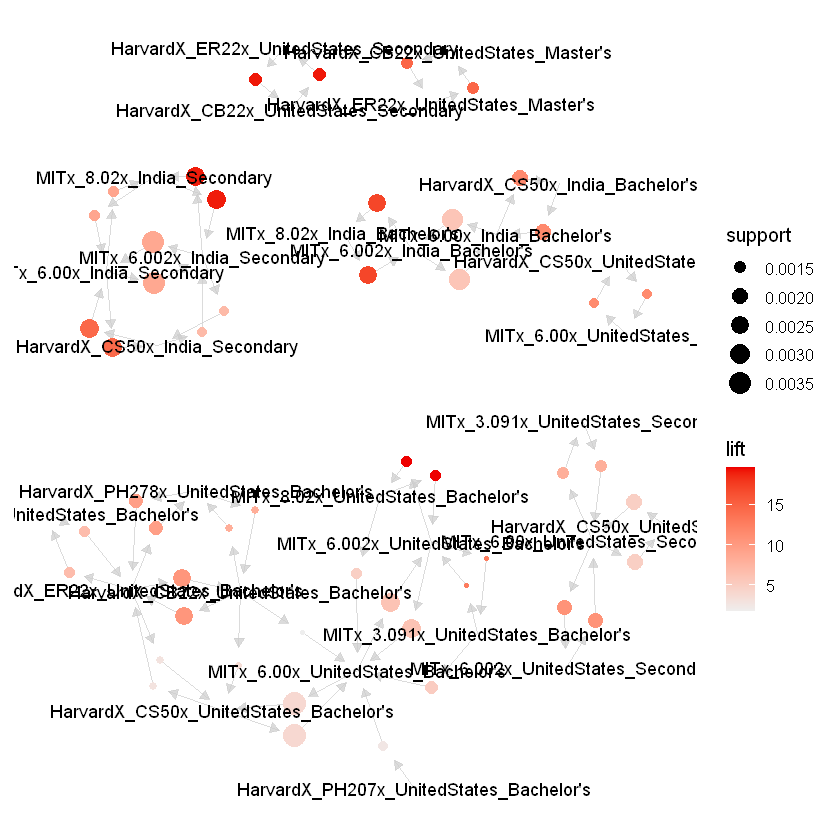

In [54]:
plot(rules, method="graph")
# 이 그래프는 너무 많은 데이터를 한꺼번에 표현하고 있기에 다음부터는 sampling해서 간추려서 그리도록 하겠습니다

In [62]:
# 그래프를 이쁘게 그리기 위해 부분집합을 만들었습니다
subrules <- subset(rules, support > 0.002)
subrules

set of 20 rules 

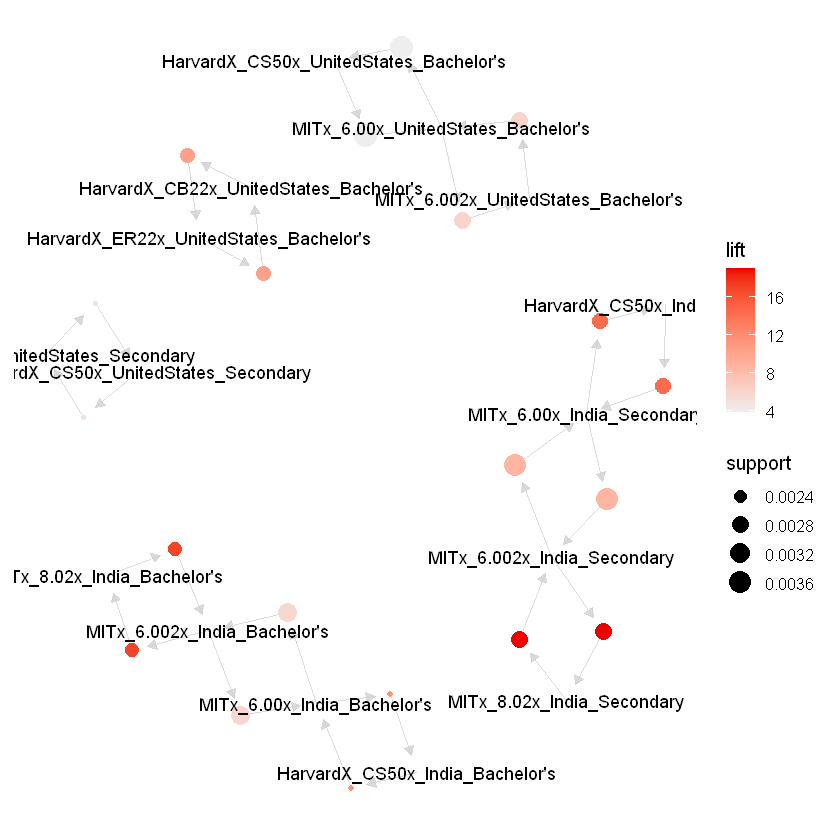

In [63]:
plot(subrules, method="graph")

### 5
위 graph의 규칙과 아래 plot의 지표들을 참조하면 아래와 같은 표가 나옵니다.

| rule | support | confidence | lift |
| --- | --- | --- | --- |
| MITx_6.002x_India_Bachelor's --> MITx_6.00x_India_Bachelor's|	0.003625801	 | 0.13598847| 5.842126 |
| MITx_6.002x_India_Bachelor's <-- MITx_6.00x_India_Bachelor's|	0.003092507	 | 0.13285550| 5.842126 |
| --- | --- | --- | --- |
| MITx_6.00x_India_Secondary --> MITx_6.002x_India_Secondary | 0.003625801	| 0.17745698 | 8.692854 |
| MITx_6.00x_India_Secondary <-- MITx_6.002x_India_Secondary | 0.003625801	| 0.17761238 | 8.692854 |
| --- | --- | --- | --- |
| MITx_6.002x_India_Secondary --> MITx_8.02x_India_Secondary | 0.002800536| 0.13718622 | 19.01179 |
| MITx_6.002x_India_Secondary <-- MITx_8.02x_India_Secondary | 0.002800536| 0.38810900 | 19.01179 |

이 표를 보면 서로 조건절과 결과절이 바뀌는 조건들은 support & lift값은 동일하지만, confidence 값은 서로 다른 것을 알 수 있습니다.
그 이유는 support와 lift는 조건절과 결과절의 위치에 따라 값이 변하지 않지만, confidence는 정의상 바뀔 수 밖에 없기 떄문입니다.

In [64]:
mat%>%filter(grepl('MITx_6.002x_India', rules))

rules,support,confidence,coverage,lift,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
{MITx_8.02x_India_Bachelor's} => {MITx_6.002x_India_Bachelor's},0.002496648,0.38564197,0.006474006,16.958041,838
{MITx_6.002x_India_Bachelor's} => {MITx_8.02x_India_Bachelor's},0.002496648,0.10978645,0.022740950,16.958041,838
{MITx_8.02x_India_Secondary} => {MITx_6.002x_India_Secondary},0.002800536,0.38810900,0.007215850,19.011790,940
{MITx_6.002x_India_Secondary} => {MITx_8.02x_India_Secondary},0.002800536,0.13718622,0.020414122,19.011790,940
{HarvardX_CS50x_India_Secondary} => {MITx_6.002x_India_Secondary},0.001290034,0.14141084,0.009122598,6.927109,433
{MITx_6.002x_India_Secondary} => {HarvardX_CS50x_India_Secondary},0.001290034,0.06319323,0.020414122,6.927109,433
{MITx_6.00x_India_Secondary} => {MITx_6.002x_India_Secondary},0.003625801,0.17745698,0.020431998,8.692854,1217
{MITx_6.002x_India_Secondary} => {MITx_6.00x_India_Secondary},0.003625801,0.17761238,0.020414122,8.692854,1217
{MITx_6.002x_India_Bachelor's} => {MITx_6.00x_India_Bachelor's},0.003092507,0.13598847,0.022740950,5.842126,1038


# extra question

## graph in circle
아래 그래프를 보면, 가장 큰 support 값을 갖고 있는 것은 0.0035이고, 이 그림상으로만 판단하면 lift & support사이에 상관관계는 없어 보입니다.

또한 lift의 범위가 15 이상 5 미만 부터 다양하게 있는 것을 알수 있습니다.

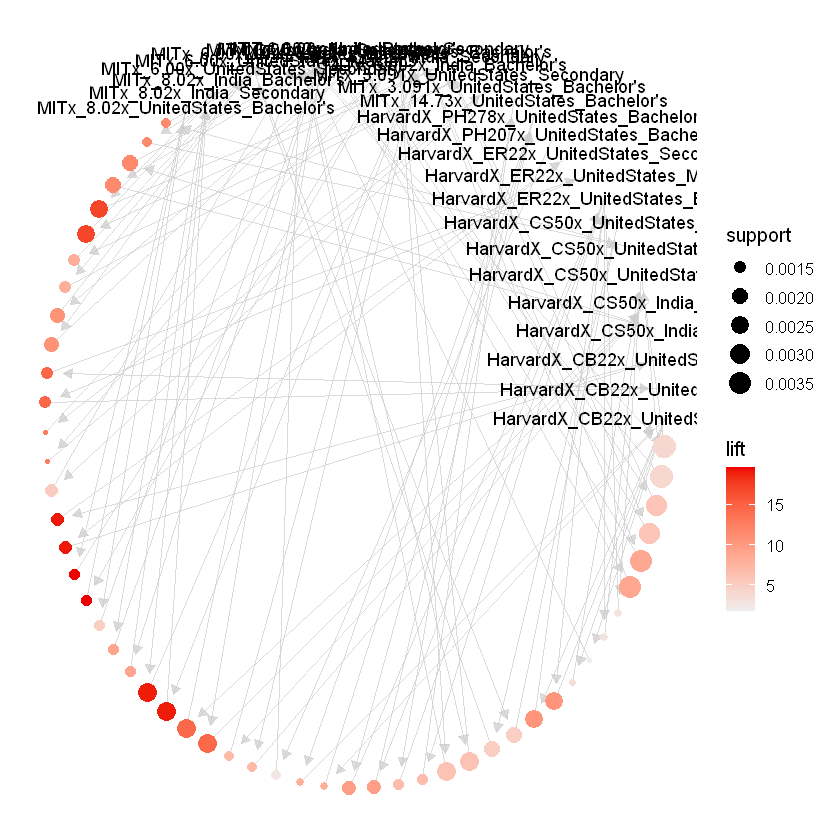

In [65]:
plot(rules, method="graph", control=list(layout=igraph::in_circle()))

set of 6 rules 

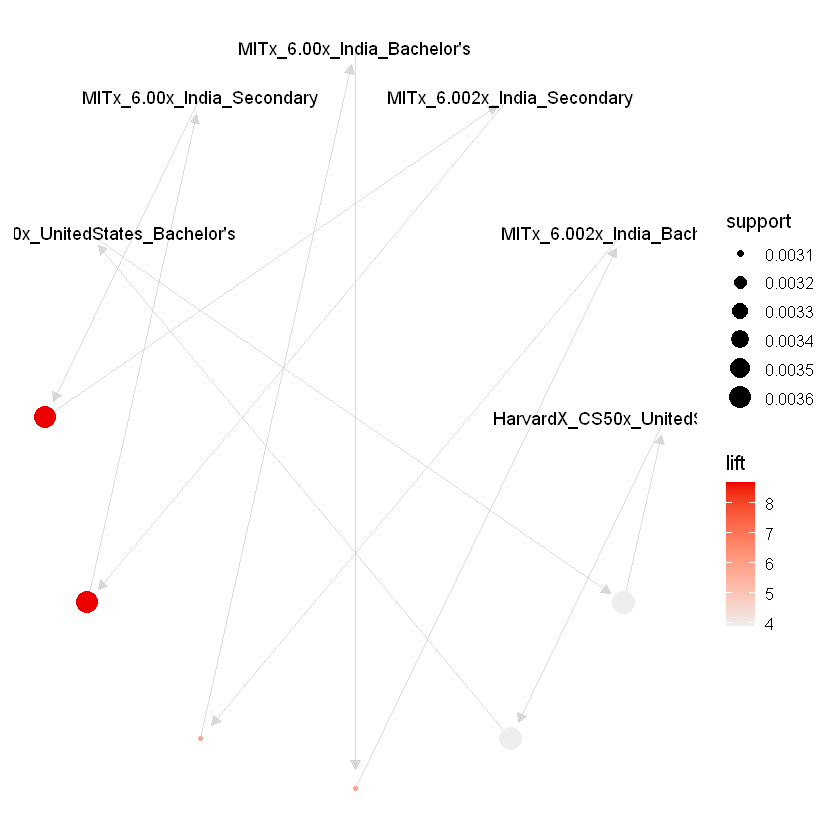

In [68]:
# 위그래프에서 support가 0.003 이상인 rule만 택하면 아래와 같습니다.
subrules <- subset(rules, support > 0.003)
subrules
plot(subrules, method="graph", control=list(layout=igraph::in_circle()))

이 graph를 구성하는 6개의 rule중, 4개는 위에서 x->y,y->x 규칙을 구할때 다뤘던 것들임을 확인 할 수있고, 위 circle graph는 모두 다 x<-->y 규칙을 만족하는 것을 알 수 있습니다.

*포함된 규칙들
MITx_6.002x_India_Bachelor's <--> MITx_6.00x_India_Bachelor's
MITx_6.00x_India_Secondary <--> MITx_6.002x_India_Secondary*


In [73]:
#ins_rule = mat[,c(1,2)]

In [74]:
#d3SimpleNetwork(ins_rule, file='rule.html')